
### Business case Introduction

**Cars24** is one of the leading used-car buying and selling platform in India.

#### Current methodology to estimate the selling price has three major components
1. Past records of the "Selling Prices" of the same _Make_ and _Model_
2. Rule based calculations for the depreciation of the car
2. Rule based calculation for condition of the vehicle

As the **Pricing Data Scientist working at Cars24, you are given a task**

### GOAL: To automate the process of estimating price of the used car



## Exploratory Data Analysis

In [1]:
!pip3 install python -library like requests flask pandas numpy matplotlib pyplot seaborn scikit-learn beautifulsoup4 lxml scrapy pillow sqlalchemy jupyterlab tensorflow keras pytorch nltk spacy plotly dash streamlit scrapy scrapy-splash scrapy-rotating-proxies scrapy-user-agents scrapy-fake-useragent scrapy-proxies scrapy-crawlera scrapy-cluster scrapy-hub scrapy-deltafetch scrapy-autothrottle scrapy-redis scrapy-selenium scrapy-splash scrapy-crawlfrontier scrapy-crawlmonitors scrapy-crawlstats scrapy-crawlutils 
!pip3 install --upgrade requests flask pandas numpy matplotlib seaborn scikit-learn beautifulsoup4 lxml scrapy pillow sqlalchemy jupyterlab tensorflow keras torch nltk spacy plotly dash streamlit scrapy-splash scrapy-rotating-proxies scrapy-user-agents scrapy-fake-useragent scrapy-proxies scrapy-crawlera scrapy-cluster scrapy-hub scrapy-deltafetch scrapy-autothrottle scrapy-redis scrapy-selenium scrapy-crawlfrontier scrapy-crawlmonitors scrapy-crawlstats scrapy-crawlutils
!pip3 install --upgrade pip setuptools wheel
!pip3 install --upgrade scrapy
!pip3 install matplotlib --upgrade --force-reinstall
!pip3 install seaborn --upgrade --force-reinstall


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -l
  Using cached flask-3.1.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached sqlalchemy-2.0.44-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.5 kB)
  Using cached tensorflow-2.20.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (4.5 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached torch-2.9.1-cp313-none-macosx_11_0_arm64.whl.metadata (30 kB)
  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached spacy-3.8.11-cp313-cp313-macosx_11_0_arm64.whl.metadata (27 kB)
  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_Lr_1 = pd.read_csv('/Users/tameemislam/Documents/Portfolio_project/Cars_24/cars24-car-price-cleaned.csv')

### Overview

In [6]:
df_Lr_1.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


### Machine only understand Numbers

## Objective

To predict the price of preowned cars

## Steps to follow

1. Preprocessing of the data (Encoding, Missing value treatment, Feature engineering, Outlier detection, duplicates, column treatment, Scaling)
2. Train

## 1. Preprocessing

### 1.1 Encoding of Categorical data

In [7]:
df_Lr_1.shape

(19820, 18)

In [9]:
df_Lr_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [10]:
df_Lr_1.select_dtypes(include=['object']).columns

Index(['make', 'model'], dtype='object')

# 1. OHE -- One hot Encoding
# 2. Label Encoding -- Ordinal Data
# 3. Target Encoding

In [11]:
df_Lr_1['model'].nunique(), df_Lr_1['make'].nunique()

(3233, 41)

### The curse of dimensionality

In [12]:
df_Lr_1.groupby('make')['selling_price'].mean()

make
AMBASSADOR        1.452500
AUDI             17.177585
BENTLEY          20.902500
BMW              17.349017
CHEVROLET         2.723621
DAEWOO            0.780000
DATSUN            3.205176
DC               11.925000
FERRARI          20.902500
FIAT              3.152795
FORCE             5.520000
FORD              5.858258
HONDA             5.979902
HYUNDAI           5.458819
ISUZU            14.037708
JAGUAR           20.187500
JEEP             16.261890
KIA              15.731515
LAMBORGHINI      20.902500
LAND             20.560147
LEXUS            20.902500
MAHINDRA          7.315421
MARUTI            4.684721
MASERATI         20.902500
MERCEDES-AMG     20.902500
MERCEDES-BENZ    17.071479
MG               17.529474
MINI             18.529457
MITSUBISHI        8.631026
NISSAN            4.611877
OPEL              1.500000
OPELCORSA         1.516667
PORSCHE          20.866400
PREMIER           2.550000
RENAULT           4.606651
ROLLS-ROYCE      20.902500
SKODA             7.182

In [13]:
df_Lr_1["make"] = df_Lr_1.groupby('make')['selling_price'].transform("mean")
df_Lr_1["model"] = df_Lr_1.groupby('model')['selling_price'].transform("mean")

In [14]:
df_Lr_1.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


### MinMax Scaler (Normalization)

### [0 - 1]

In [16]:
!pip3 install scikit-learn --upgrade --force-reinstall

  Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.3.5-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached scipy-1.16.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl (8.6 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached numpy-2.3.5-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
Using cached scipy-1.16.3-cp313-cp313-macosx_14_0_arm64.whl (20.9 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.00m 0/5 [threadpoolctl]
  Attempting uninstall: numpy━━━━━━━━━━━━━━━━━━━ 0/5 [threadpoolctl]
    Found existing installation:

In [18]:
from sklearn.preprocessing import  MinMaxScaler

scaler = MinMaxScaler()

df_Lr_1 = pd.DataFrame(scaler.fit_transform(df_Lr_1), columns=df_Lr_1.columns)

df_Lr_1

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.300934,0.862069,0.018258,0.168879,0.202014,0.099919,0.137931,0.484670,0.328028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19816,0.434413,0.931034,0.004711,0.116379,0.203347,0.138647,0.068966,0.194048,0.330632,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
19817,0.191724,0.793103,0.017606,0.147759,0.221860,0.158647,0.206897,0.318156,0.200656,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19818,0.580027,0.827586,1.000000,0.103448,0.322719,0.217391,0.172414,0.324782,0.377671,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## 2. Training of the ML model

### 2.1 Spliting the data into Training and Testing

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df_Lr_1.drop(columns=["selling_price"]) # Independent variables
y = df_Lr_1["selling_price"] # dependent variables

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


- 70% of the data is for Training
- 30% of the data is for Testing

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((13874, 17), (13874,), (5946, 17), (5946,))

<Axes: xlabel='selling_price', ylabel='age'>

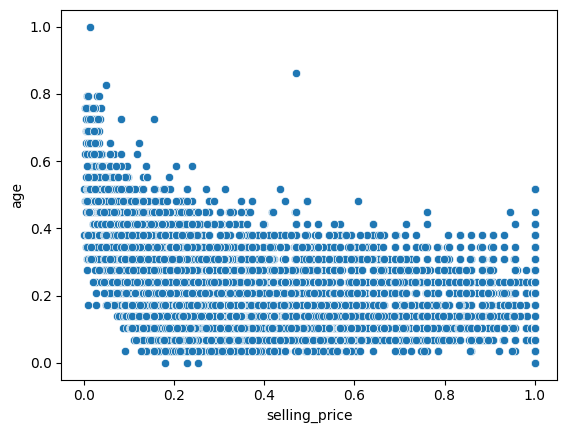

In [24]:
sns.scatterplot(x= df_Lr_1['selling_price'], y=df_Lr_1['age'])

### 2.2 Univariate Model

In [25]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
X1_train.shape, y_train.shape

((13874, 1), (13874,))

In [29]:
model.fit(X1_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
model.coef_, model.intercept_

(array([0.99881913]), np.float64(0.00130068291859875))

In [31]:
y_hat = model.predict(X1_test)

<function matplotlib.pyplot.show(close=None, block=None)>

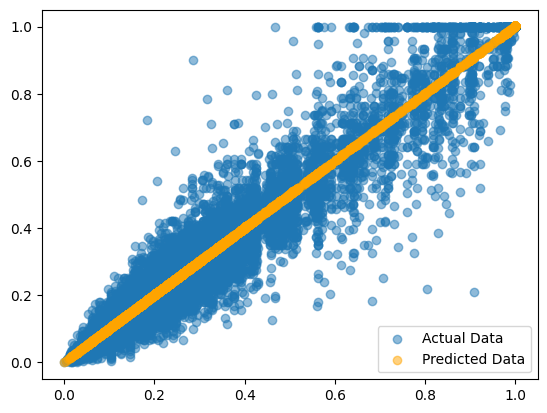

In [39]:
# Plotting Actual vs Predicted values
plt.scatter(X1, y, label='Actual Data',  alpha=0.5) 
plt.scatter(X1_test, y_hat, label='Predicted Data', color='orange', alpha=0.5)
plt.legend()
plt.show

### 2.3 Multivariate

In [40]:
X.shape, y.shape

((19820, 17), (19820,))

In [41]:
X_train.shape, y_train.shape

((13874, 17), (13874,))

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
model.coef_, model.intercept_

(array([ 0.12358025, -0.5640133 , -0.25897669,  0.08319302,  0.03142999,
        -0.12358025,  0.06902383,  0.85733269, -0.0062768 , -0.0105836 ,
         0.00569622,  0.11686505,  0.01498201, -0.00995931, -0.0048959 ,
        -0.01238884, -0.02063572]),
 np.float64(-0.0020544363848240543))

In [45]:
y_hat = model.predict(X_test)

In [46]:
y_test[:3] ## Actual Label from testing

960     0.325203
4073    0.215993
4339    0.291227
Name: selling_price, dtype: float64

In [47]:
y_hat[:3] ## Predicted by the model

array([0.22505866, 0.24876761, 0.26604925])

### Evaluation Metrics

In [48]:
model.score(X_test, y_test) ## R squared value

0.9454380064781046

In [49]:
model.score(X_train, y_train) ## R squared value

0.945747515652262